# pytorchを学ぶ

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 4)


---

## `torch.Tensor`

pytorchでは**データ**を`torch.Tensor`というtorch専用の型で扱う。
`numpy.ndarray`と似てる。

ここで指すデータには、ベクトル・行列を含めたテンソルに加えスカラーも含まれる。

[torch.Tensor — PyTorch 1.11.0 documentation](https://pytorch.org/docs/stable/tensors.html)  

<br>

参考  
- [【Pytorch】tensor型とは｜知らないとまずいものをまとめてみた｜努力のガリレオ](https://dreamer-uma.com/pytorch-tensor/)

### `torch.Tensor`の生成

`torch.tensor()`で生成

[torch.tensor — PyTorch 1.11.0 documentation](https://pytorch.org/docs/stable/generated/torch.tensor.html)

In [2]:
# スカラー
x = torch.tensor(1)
x

tensor(1)

In [3]:
# ベクトル
x = torch.tensor([1, 2, 3])
x

tensor([1, 2, 3])

In [4]:
# 行列
x = torch.tensor([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
x

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

#### 型指定

型が違うと演算時にエラーを吐くことがあるので注意。

##### 引数で指定

`dtype=`

In [5]:
torch.tensor([1, 2, 3], dtype=float)

tensor([1., 2., 3.], dtype=torch.float64)

##### 関数を使用

- `torch.LongTensor()`
- `torch.FloatTensor()`

In [6]:
print(torch.LongTensor([1, 2, 3])) # int型
print(torch.FloatTensor([1, 2, 3])) # float型

tensor([1, 2, 3])
tensor([1., 2., 3.])


### メソッド

基本的なメソッドがnumpyと同じように用意されている。

In [9]:
x = torch.tensor([1., 2., 3.])

print("sum:", x.sum())
print("mean:", x.mean())
print("std:", x.std())
print("max:", x.max())
print("log:", x.log())
print("exp:", x.exp())

sum: tensor(6.)
mean: tensor(2.)
std: tensor(1.)
max: tensor(3.)
log: tensor([0.0000, 0.6931, 1.0986])
exp: tensor([ 2.7183,  7.3891, 20.0855])


他にもたくさんある。当然、`torch.メソッド(x)`のような使い方もできる。

また後ろに`_`をつけるとインプレースになる。

In [10]:
print(x)
x.log_()
print(x)

tensor([1., 2., 3.])
tensor([0.0000, 0.6931, 1.0986])


### 自動微分

勾配を自動で求めてくれる。

例えば、

$$
y = x_1^2 + x_2^2
$$

で、$x_1=3$、$x_2=-3$ の時

<br>

まずTensorを生成する。この時 `requires_grad=True` を指定する。あと `dtype` は `float` になる様にする。

In [44]:
x1 = torch.tensor(3, dtype=float, requires_grad=True)
x2 = torch.tensor(-3, dtype=float, requires_grad=True)
y = x1**2 + x2**2
y

tensor(18., dtype=torch.float64, grad_fn=<AddBackward0>)

`.backward()` で逆伝播

In [45]:
y.backward()

こうすると、$x_1$、$x_2$ に逆伝播の値が保存される。

In [46]:
x1.grad

tensor(6., dtype=torch.float64)

In [47]:
x2.grad

tensor(-6., dtype=torch.float64)

$$
\frac{\partial y}{\partial x_1} = 2x_1
$$

$$
\frac{\partial y}{\partial x_2} = 2x_2
$$

なので正解。すげー。

まとめてもいける。

In [48]:
x = torch.tensor([3, -3], dtype=float, requires_grad=True)
y = (x**2).sum()
y.backward()
x.grad

tensor([ 6., -6.], dtype=torch.float64)


---

## ネットワーク構築



### `torch.nn`

NNで使う基本的なものがいっぱい入っている。  

- レイヤー
- 活性化関数
- 損失関数

など

[torch.nn — PyTorch 1.11.0 documentation](https://pytorch.org/docs/stable/nn.html)

<br>

関数系はここからも使える

[torch.nn.functional — PyTorch 1.11.0 documentation](https://pytorch.org/docs/stable/nn.functional.html#)  

In [49]:
from torch import nn

### `torch.nn.Module`

すべてのニューラルネットワークモジュールの基本クラス。これを継承してネットワークを構築していく。

[Module — PyTorch 1.11.0 documentation](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module)

In [50]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()

### `torch.nn.Linear`

レイヤー。全結合層。kerasでいうDense。  
入力と出力の数を与える。

[Linear — PyTorch 1.11.0 documentation](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear)

In [136]:
input_size, output_size = 10, 2
layer = nn.Linear(input_size, output_size)

レイヤーに`(batch_size, input_size)`のTensorを入力

In [139]:
x = torch.arange(30, dtype=torch.float32).reshape(3, -1)
y = layer(x)
y

tensor([[ 3.0191,  3.2601],
        [ 9.3899,  7.1729],
        [15.7608, 11.0856]], grad_fn=<AddmmBackward0>)

1次元のベクトルでも化

In [140]:
x = torch.arange(10, dtype=torch.float32)
y = layer(x)
y

tensor([3.0191, 3.2601], grad_fn=<AddBackward0>)

使われているパラメータは`.parameters()`で確認できる。

In [53]:
list(layer.parameters())

[Parameter containing:
 tensor([[ 0.0657, -0.0261, -0.1822,  0.2825, -0.1815,  0.2818,  0.0826, -0.0173,
           0.2875,  0.0155],
         [ 0.0124,  0.1381,  0.0906, -0.2981, -0.1240,  0.1213, -0.1889, -0.0923,
          -0.3127, -0.1823]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2850, -0.1712], requires_grad=True)]

ニューラルネットワークにレイヤーを追加

今回は2層

In [54]:
input_size, hidden_size, output_size = 10, 5, 1

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, output_size)

### 順伝播

順伝播を定義する。

In [55]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        z = self.l1(x)
        y = self.l2(z)
        return y

### 活性化関数

2通りの使い方がある

In [56]:
x = torch.Tensor([-2, -1, 0, 1, 2])

In [57]:
# 1つ目
f = nn.ReLU()
pre = f(x)
pre

tensor([0., 0., 0., 1., 2.])

In [58]:
# 2つめ
import torch.nn.functional as F

pre = F.relu(x)
pre

tensor([0., 0., 0., 1., 2.])

順伝播に活性化関数をかける

In [59]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        z = F.relu(self.l1(x))
        y = self.l2(z)
        return y

### `nn.Sequential`

実はネットワークの構築方法も色々(?)ある

In [60]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq_net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        y = self.seq_net(x)
        return y


---

## 予測

とりあえず構築したモデルで予測(順伝播)を行う

In [61]:
import numpy as np
arr = np.arange(20).reshape(-1, 10)
x = torch.Tensor(arr)
x

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14., 15., 16., 17., 18., 19.]])

In [62]:
model = NeuralNetwork()
model(x)

tensor([[-0.0897],
        [-0.2032]], grad_fn=<AddmmBackward0>)

`forward()`メソッドをこちらから呼び出す必要はないっぽい。

kerasと違って1次元の入力もできる

In [63]:
model(x[0])

tensor([-0.0897], grad_fn=<AddBackward0>)

パラメータもレイヤーのやつと同じ様に求められる

In [64]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.2538,  0.2280,  0.0749, -0.0023,  0.2559,  0.1453, -0.0696,  0.0230,
          -0.2359, -0.1536],
         [-0.0563,  0.1059,  0.3136, -0.1034,  0.1313, -0.1395, -0.1700, -0.0046,
           0.1533, -0.2799],
         [-0.2651, -0.1808,  0.2632, -0.1076,  0.3100,  0.2641,  0.0506,  0.1603,
           0.0966, -0.1592],
         [ 0.2852, -0.0993, -0.2019, -0.2733, -0.1509,  0.2160,  0.1037, -0.0433,
           0.2344,  0.1087],
         [-0.1708, -0.2179, -0.2725,  0.2005, -0.1602,  0.0326,  0.3096,  0.2741,
          -0.3134, -0.2311]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0940, -0.1752,  0.0303,  0.0253,  0.0762], requires_grad=True),
 Parameter containing:
 tensor([[-0.4457,  0.3763,  0.1036, -0.3130, -0.2868]], requires_grad=True),
 Parameter containing:
 tensor([0.2961], requires_grad=True)]


---

## 学習データ

今回はsin波の続きを予測するモデルを作る。とりあえずnumpyで用意する。

In [65]:
import my_datasets # 自作モジュール
import matplotlib.pyplot as plt

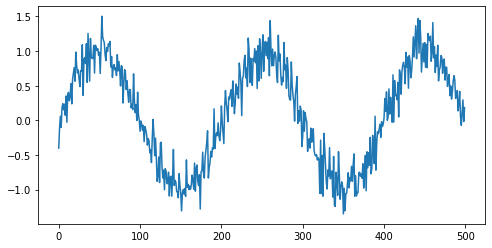

In [129]:
sin_y = my_datasets.SinNoise(10000)
plt.plot(sin_y[:500]);

In [67]:
X, y = sin_y.split(50)

これをtorchで扱える形に変換する

[torch.utils.data — PyTorch 1.11.0 documentation](https://pytorch.org/docs/stable/data.html)

#### Tensor

Tensorに変換

In [68]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
print(X.size(), y.size())

torch.Size([9950, 50]) torch.Size([9950])


#### Dataset

Datasetを作成。特徴量とラベルを一つにまとめたもの。

[PytorchのDatasetを徹底解説（自作データセットも作れる）｜努力のガリレオ](https://dreamer-uma.com/pytorch-dataset/)

In [69]:
datasets = torch.utils.data.TensorDataset(X, y)

#### DataLoader

DataLoaderを作成。学習データをバッチサイズ分取り出すジェネレータ。

In [70]:
batch_size = 256

data_loader = torch.utils.data.DataLoader(
    dataset=datasets,
    batch_size=batch_size,
    shuffle=True) # ミニバッチをランダムに取り出す

In [71]:
# ちょっと見てみる
X, y = next(iter(data_loader))
print(type(X), X.size())
print(type(y), y.size())


<class 'torch.Tensor'> torch.Size([256, 50])
<class 'torch.Tensor'> torch.Size([256])


### torchvision

サンプルデータ。torchで使いやすくなっている。

In [72]:
from torchvision.datasets import MNIST
from torchvision import transforms

datasetとして読み込み

```
data = MNIST(
    root='./data', # データのファイルパス(ない場合は勝手にダウンロードされる)
    train=True, # 訓練データかラベルデータか
    transform=transforms.ToTensor(), # Tensor型に変換
    download=False)
```

In [73]:
train_data = MNIST(
    root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=False)

test_data = MNIST(
    root='./data',
    train=False,
    transform=transforms.ToTensor(),
    download=False)

train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

特徴とラベルに分けたい場合

In [74]:
X_train = train_data.data
y_train = train_data.targets
X_train.size(), y_train.size()

(torch.Size([60000, 28, 28]), torch.Size([60000]))

同じ様にDataLoaderに変換

In [75]:
batch_size = 256

train_loader = torch.utils.data.DataLoader(
    dataset=train_data,
    batch_size=batch_size,
    shuffle=True)

test_loader = torch.utils.data.DataLoader(
    dataset=test_data,
    batch_size=batch_size,
    shuffle=False)

In [76]:
for X, y in train_loader:
    print(type(X), X.size())
    print(type(y), y.size())
    break

<class 'torch.Tensor'> torch.Size([256, 1, 28, 28])
<class 'torch.Tensor'> torch.Size([256])



---

## 学習

上で述べた通り、今回はsin波の続きを予測するモデルを作る。

学習させる。その前に、誤差関数、学習アルゴリズムを決める。

### 誤差関数

交差エントロピーを例に挙げる

In [77]:
p = torch.tensor([[0.1, 0.2, 0.7], [0.3, 0.4, 0.3]])
t = torch.tensor([[0, 0, 1], [0, 1, 0]], dtype=float)
loss = F.cross_entropy(p, t)
print(type(loss))
print(loss, loss.size())

<class 'torch.Tensor'>
tensor(0.9005, dtype=torch.float64) torch.Size([])


(サンプル数, クラス数)の出力とラベルを与えると誤差が返ってくる。型はfloatではなくTensor。

### 学習アルゴリズム

おぷてぃまいざー。

In [78]:
from torch import optim

SGD(確率的勾配降下法)

モデルのパラメータと学習率を与えてインスタンスを生成。

In [79]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

### 学習

`fit()`みたいなメソッドが用意されているわけでは無いので、自分で書く。  

とりあえずDataLoader、modelなど作成

In [80]:
input_size, hidden_size, output_size = 50, 10, 1
batch_size = 256


sin_y = my_datasets.SinNoise(10000)
X, y = sin_y.split(50)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
datasets = torch.utils.data.TensorDataset(X, y)
data_loader = torch.utils.data.DataLoader(
    dataset=datasets,
    batch_size=batch_size,
    shuffle=True)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        z = F.relu(self.l1(x))
        y = self.l2(z)
        return y

model = NeuralNetwork()
optimizer = optim.SGD(model.parameters(), lr=0.01)

#### パラメータの更新

自動微分で勾配を求めてパラメータを更新する

まずミニバッチを取得し、予測する

In [81]:
batch_X, batch_y = next(iter(data_loader))
y = model(batch_X)

モデルを学習モードにする

In [82]:
model.train()

NeuralNetwork(
  (l1): Linear(in_features=50, out_features=10, bias=True)
  (l2): Linear(in_features=10, out_features=1, bias=True)
)

誤差の算出。平均二乗誤差。

In [83]:
loss = F.mse_loss(y, batch_y.view(-1, 1))
loss

tensor(0.5819, grad_fn=<MseLossBackward0>)

逆伝播で勾配を求める。誤差関数の各変数に勾配が保存される。

In [84]:
# 逆伝播
loss.backward()

勾配に学習率をかけてパラメータを更新する

In [85]:
optimizer.step()

これらを繰り返し、学習を行う。

では、1エポックごとに行う処理を関数化してみる

In [86]:
def train():
    model.train()
    for (X, labels) in data_loader:
        # 勾配をリセット
        optimizer.zero_grad()

        y = model(X)
        loss = F.mse_loss(y, labels.view(-1, 1))
        loss.backward()
        optimizer.step()

    return loss.item()

ではこれをいっぱい繰り返してみよう

In [87]:
eopchs = 100

In [88]:
loss = []
for _ in range(eopchs):
    loss.append(train())

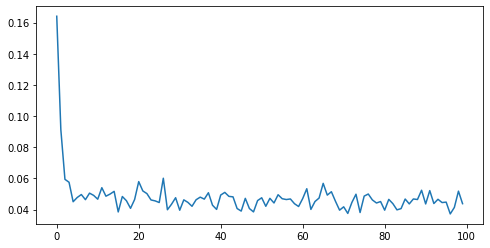

In [141]:
plt.plot(loss);

おー、いいじゃん

最初の50個を与えてsin波を生成させてみよう

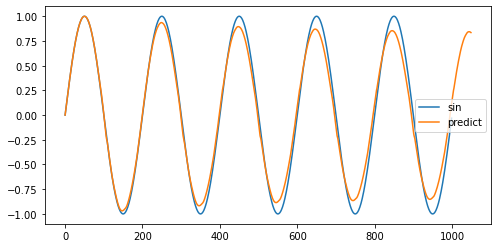

In [142]:
n = 50
n_iter = 1000
sin = my_datasets.SinNoise(n, std=0)
sin = torch.FloatTensor(sin)
for _ in range(n_iter):
    sin = torch.cat((sin, model(sin[-n:])))

plt.plot(my_datasets.SinNoise(n_iter, std=0), label='sin')
plt.plot(sin.detach().numpy(), label='predict')
plt.legend();